In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv(r"C:\Users\adity\Documents\datamining\patient_enrolment_data.csv")

# Creating a new target column based on BMI and Exercise Frequency
df['Strict_Diet_Necessary'] = np.where((df['BMI'] >= 30) & (df['Exercise_Frequency_per_Week'] <= 2), 'Yes', 'No')

# Features and target variable
X = df[['BMI', 'Exercise_Frequency_per_Week']]
y = df['Strict_Diet_Necessary']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Naive Bayes model
model = GaussianNB()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_str)



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [10]:
import pandas as pd
from sklearn.cluster import KMeans

# Loading the CSV file
data = pd.read_csv(r"C:\Users\adity\Documents\datamining\patient_clustering_data.csv")

# Preparing the data for clustering (using only BMI and Exercise_Frequency_per_Week for K-means)
X = data[['BMI', 'Exercise_Frequency_per_Week']]

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Mapping clusters to human-readable labels (Weak, Normal, Healthy)
centroids = kmeans.cluster_centers_

# Assigning human-readable labels based on centroid analysis
data['Cluster_Label'] = data['Cluster'].map({0: 'Weak', 1: 'Normal', 2: 'Healthy'})

# Displaying the clustered data
data[['BMI', 'Exercise_Frequency_per_Week', 'Cluster_Label']].head(20)


,BMI,Exercise_Frequency_per_Week,Cluster_Label
0,22.993428,3,Weak
1,21.723471,4,Weak
2,23.295377,3,Weak
3,25.046060,3,Weak
4,21.531693,3,Weak
5,21.531726,4,Weak
6,25.158426,4,Weak
7,23.534869,4,Weak
8,21.061051,3,Weak
9,23.085120,3,Weak


Accuracy: 0.6


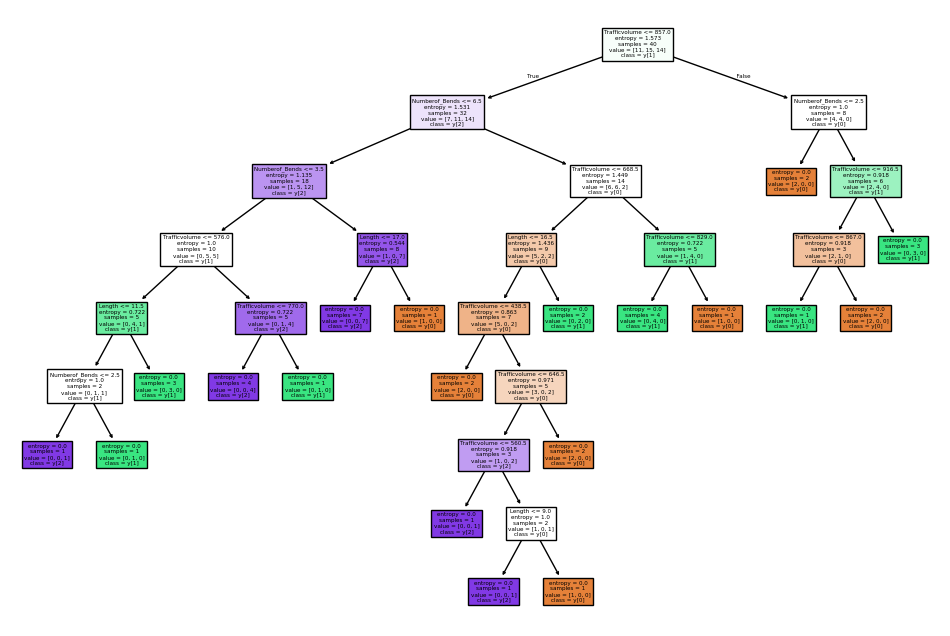

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\adity\Documents\datamining\road_transport_records.csv")

# Feature columns and target variable
X = df[['Length', 'Numberof_Bends', 'Trafficvolume']]  # Features
y = df['AccidentRisk']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with the 'entropy' criterion (ID3-like)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model (accuracy, confusion matrix, etc.)
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=['Length', 'Numberof_Bends', 'Trafficvolume'], class_names=True, filled=True)
plt.show()
